In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
with open("../DOCS/[32]custom_cnn_results.json", "r") as f:
    CU32 = json.load(f)
with open("../DOCS/[64]custom_cnn_results.json", "r") as f:
    CU64 = json.load(f)
with open("../DOCS/[128]custom_cnn_results.json", "r") as f:
    CU128 = json.load(f)
with open("../DOCS/[256]custom_cnn_results.json", "r") as f:
    CU256 = json.load(f)
with open("../DOCS/[32]tf_cnn_results.json", "r") as f:
    TF32 = json.load(f)
with open("../DOCS/[64]tf_cnn_results.json", "r") as f:
    TF64 = json.load(f)
with open("../DOCS/[128]tf_cnn_results.json", "r") as f:
    TF128 = json.load(f)
print("Data loaded successfully.")
with open("../DOCS/[256]tf_cnn_results.json", "r") as f:
    TF256 = json.load(f)

Data loaded successfully.


In [4]:
comp = [
    ("CuPy 32", CU32),
    ("CuPy 64", CU64),
    ("CuPy 128", CU128),
    ("CuPy 256", CU256),
    ("TensorFlow 32", TF32),
    ("TensorFlow 64", TF64),
    ("TensorFlow 128", TF128),
    ("TensorFlow 256", TF256),
]

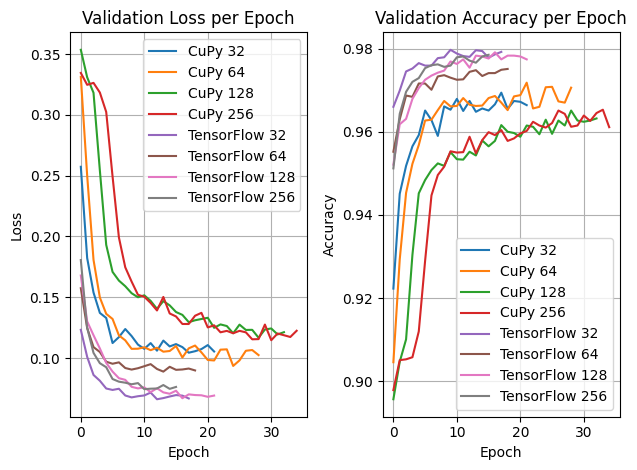

In [5]:
plt.subplot(1, 2, 1)
for label, data in comp:
    plt.plot(data["val_loss"], label=label)
plt.title("Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy comparison
plt.subplot(1, 2, 2)
for label, data in comp:
    plt.plot(data["val_accuracy"], label=label)
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

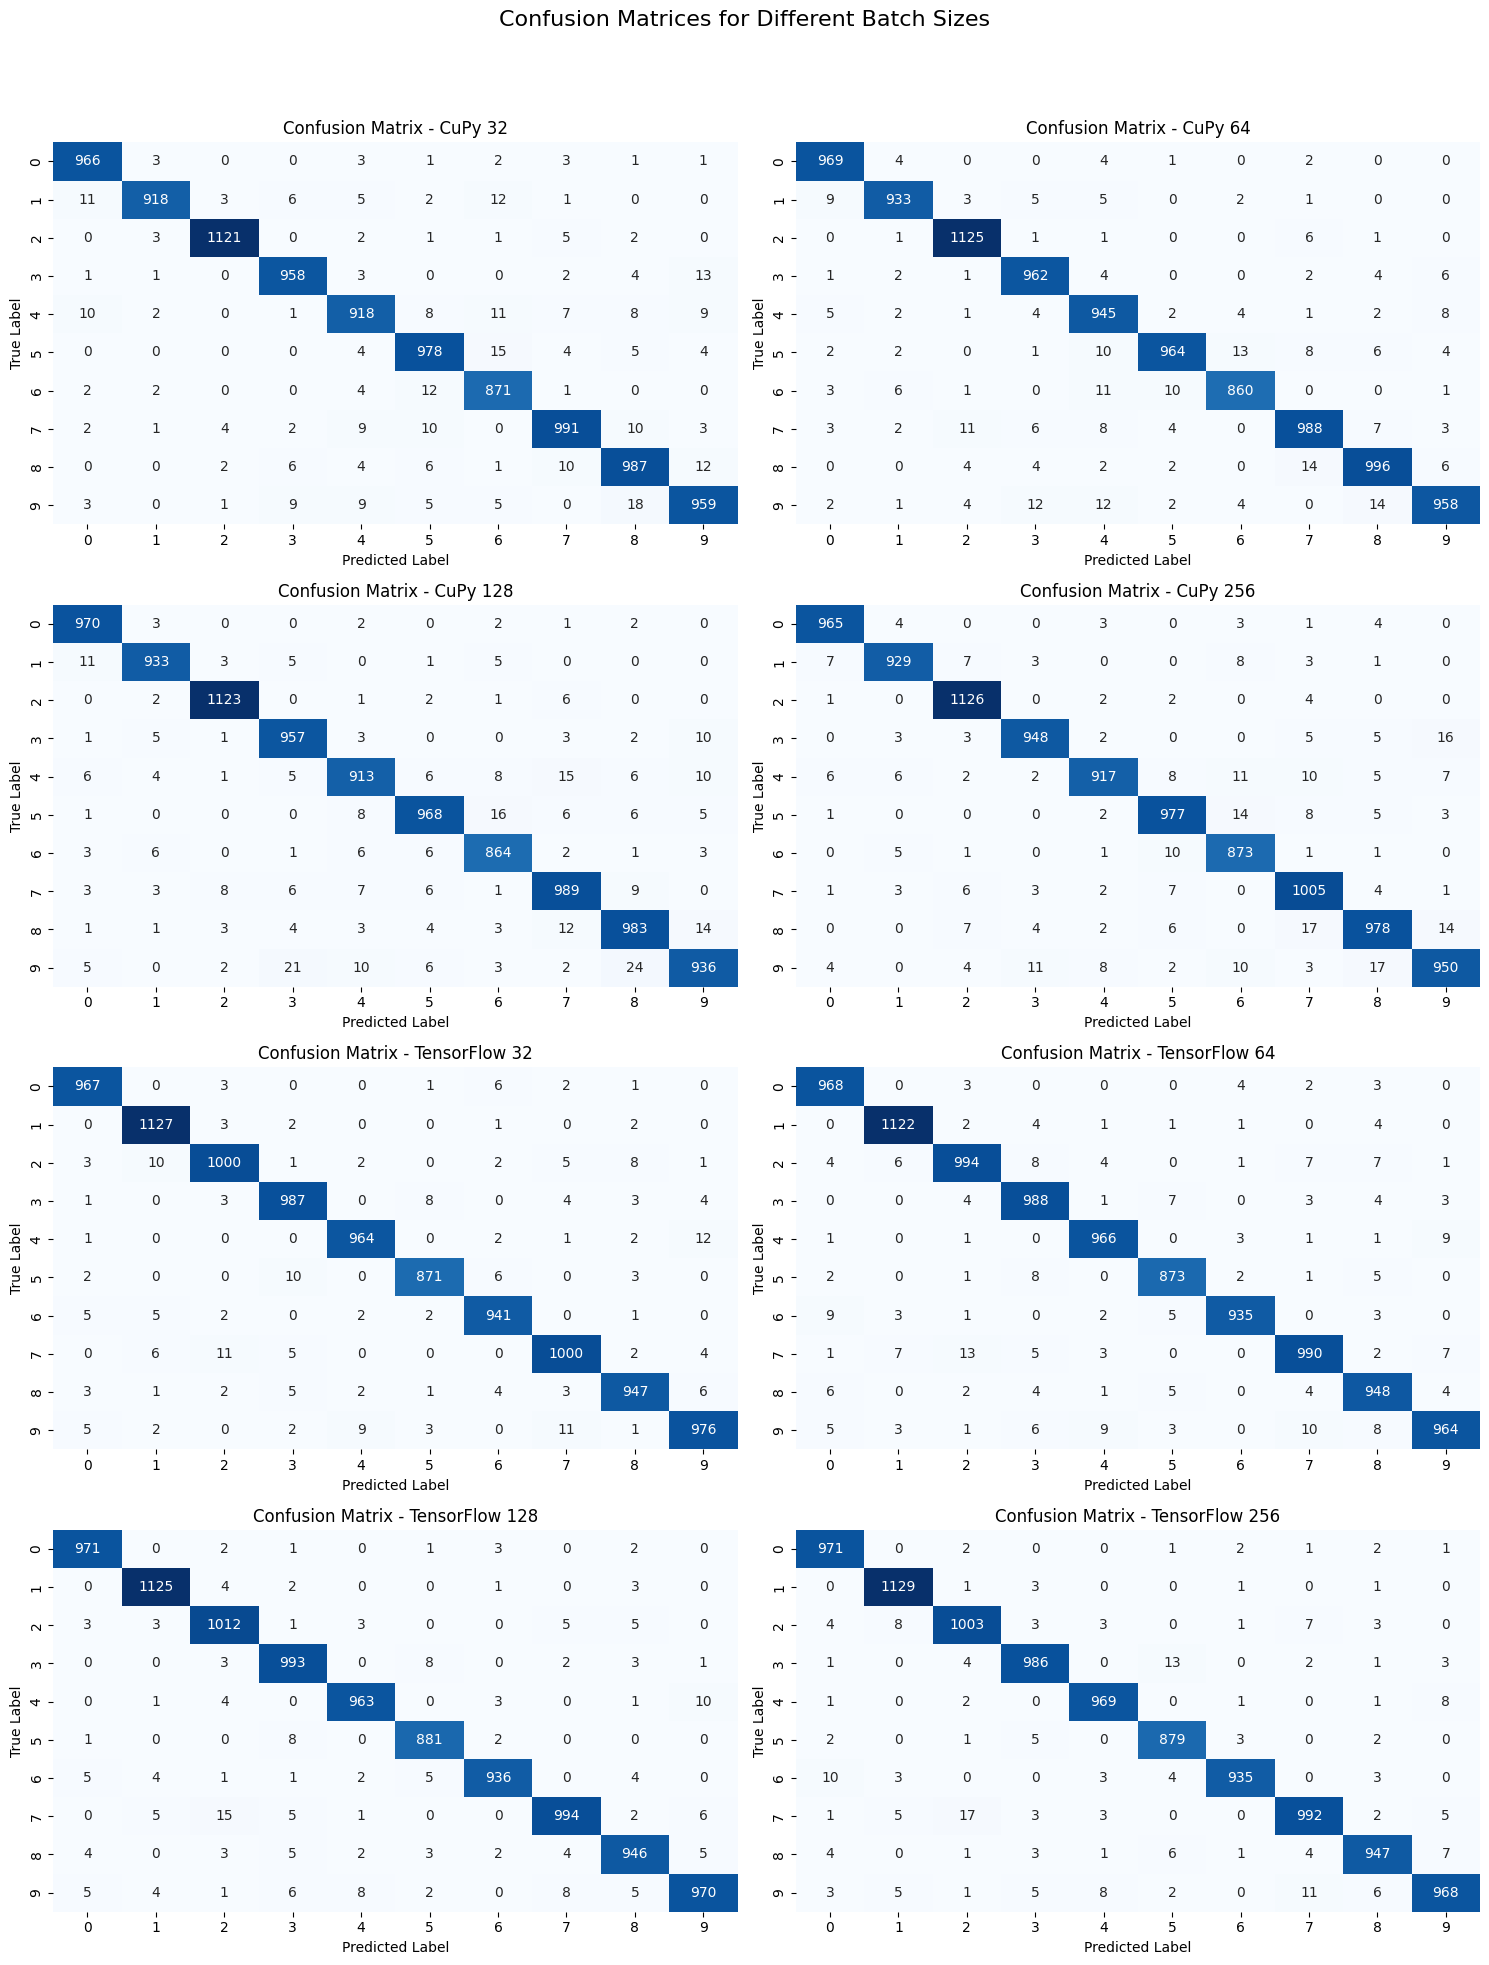

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
for i, (label, data) in enumerate(comp):
    cm = data["confusion_matrix"]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {label}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.suptitle("Confusion Matrices for Different Batch Sizes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

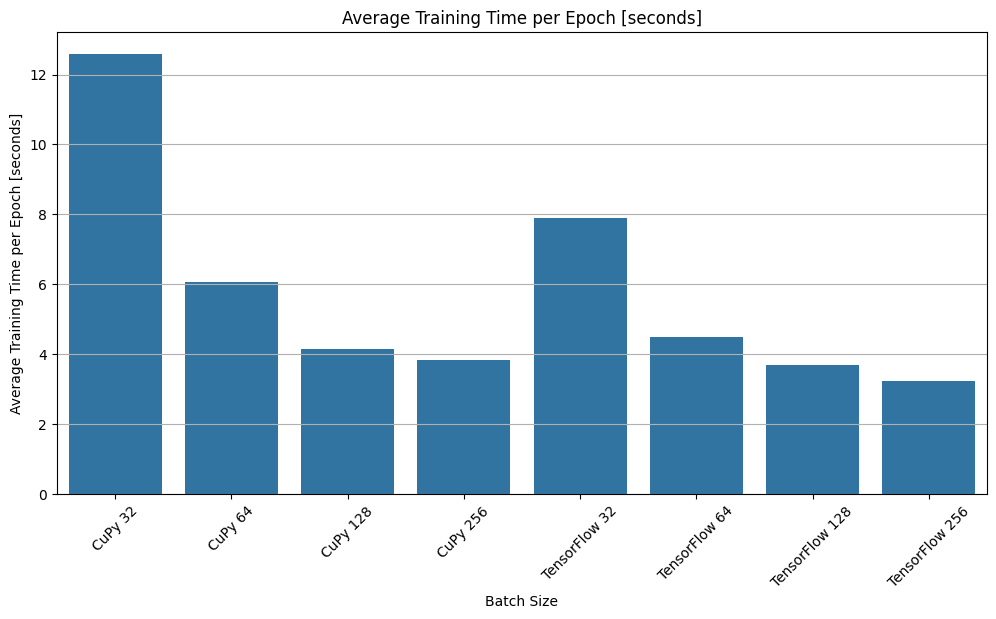

In [7]:
x = comp
x = [label for label, _ in x]
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.xlabel("Batch Size")
plt.ylabel("Average Training Time per Epoch [seconds]")
Y = []

for label, data in comp:
    avg_time = data["training_time_seconds"] / data["epochs_done"]
    Y.append(avg_time)
sns.barplot(x=x, y=Y)
plt.grid(axis="y")
plt.title("Average Training Time per Epoch [seconds]")
plt.show()